## This project will look at the data of failed US banks
 #### <li>This is a practice project with Pandas</li>
 #### <li>Data will be extracted from an html url, where a table of failed US banks reside</li>
 #### <li>Manipulate data and convert formats to answer the question in mind. </li>
 #### <li>First question: which months had the highest number of failed banks</li>
 #### <li>Sedond question: Which states have the highest/lowest rates of failed banks</li>
 

In [3]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame,read_html
import datetime as dt

import matplotlib.pylab as plt

In [4]:
url = 'http://www.fdic.gov/bank/individual/failed/banklist.html'

In [5]:
df = pd.io.html.read_html(url)

In [6]:
#for table data, index is 0 from df
df = df[0]

In [7]:
df.head(10)

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb","May 26, 2017","July 26, 2017"
1,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,"May 5, 2017","July 26, 2017"
2,First NBC Bank,New Orleans,LA,58302,Whitney Bank,"April 28, 2017","July 26, 2017"
3,Proficio Bank,Cottonwood Heights,UT,35495,Cache Valley Bank,"March 3, 2017","May 18, 2017"
4,Seaway Bank and Trust Company,Chicago,IL,19328,State Bank of Texas,"January 27, 2017","May 18, 2017"
5,Harvest Community Bank,Pennsville,NJ,34951,First-Citizens Bank & Trust Company,"January 13, 2017","May 18, 2017"
6,Allied Bank,Mulberry,AR,91,Today's Bank,"September 23, 2016","November 17, 2016"
7,The Woodbury Banking Company,Woodbury,GA,11297,United Bank,"August 19, 2016","June 1, 2017"
8,First CornerStone Bank,King of Prussia,PA,35312,First-Citizens Bank & Trust Company,"May 6, 2016","September 6, 2016"
9,Trust Company Bank,Memphis,TN,9956,The Bank of Fayette County,"April 29, 2016","September 6, 2016"


In [8]:
#creating a copy of the first df
df2=df
df2.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb","May 26, 2017","July 26, 2017"
1,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,"May 5, 2017","July 26, 2017"
2,First NBC Bank,New Orleans,LA,58302,Whitney Bank,"April 28, 2017","July 26, 2017"
3,Proficio Bank,Cottonwood Heights,UT,35495,Cache Valley Bank,"March 3, 2017","May 18, 2017"
4,Seaway Bank and Trust Company,Chicago,IL,19328,State Bank of Texas,"January 27, 2017","May 18, 2017"


In [9]:
# changing format of the column to datetime format
df2['Closing Date'] = pd.to_datetime(df2['Closing Date'])


In [10]:
df2.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",2017-05-26,"July 26, 2017"
1,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,2017-05-05,"July 26, 2017"
2,First NBC Bank,New Orleans,LA,58302,Whitney Bank,2017-04-28,"July 26, 2017"
3,Proficio Bank,Cottonwood Heights,UT,35495,Cache Valley Bank,2017-03-03,"May 18, 2017"
4,Seaway Bank and Trust Company,Chicago,IL,19328,State Bank of Texas,2017-01-27,"May 18, 2017"


In [11]:
df2['Closing Date'][0].strftime('%B')

'May'

In [12]:
# in order to find only the month name from the column, then count the 
#the number of failed banks for each state
df2['Closing Date']=df2['Closing Date'].dt.strftime('%B')

In [13]:
df2.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",May,"July 26, 2017"
1,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,May,"July 26, 2017"
2,First NBC Bank,New Orleans,LA,58302,Whitney Bank,April,"July 26, 2017"
3,Proficio Bank,Cottonwood Heights,UT,35495,Cache Valley Bank,March,"May 18, 2017"
4,Seaway Bank and Trust Company,Chicago,IL,19328,State Bank of Texas,January,"May 18, 2017"


In [14]:
# counting failures by month and adding it into dictionary 
counts_by_month = df2['Closing Date'].value_counts().to_dict()


In [15]:
counts_by_month

{'April': 59,
 'August': 41,
 'December': 34,
 'February': 44,
 'January': 51,
 'July': 74,
 'June': 36,
 'March': 40,
 'May': 43,
 'November': 35,
 'October': 58,
 'September': 38}

In [16]:
# States with most fails
highest_state_fail = df2['ST'].value_counts()[:5]

lowest_state_fail = df2['ST'].value_counts()[-5:]

In [17]:
highest_state_fail

GA    93
FL    75
IL    68
CA    41
MN    23
Name: ST, dtype: int64

In [18]:
df2['ST'].value_counts().to_dict()

{'AL': 7,
 'AR': 4,
 'AZ': 16,
 'CA': 41,
 'CO': 10,
 'CT': 2,
 'FL': 75,
 'GA': 93,
 'HI': 1,
 'IA': 2,
 'ID': 2,
 'IL': 68,
 'IN': 3,
 'KS': 9,
 'KY': 2,
 'LA': 4,
 'MA': 1,
 'MD': 10,
 'MI': 14,
 'MN': 23,
 'MO': 16,
 'MS': 2,
 'NC': 7,
 'NE': 3,
 'NH': 1,
 'NJ': 7,
 'NM': 3,
 'NV': 12,
 'NY': 5,
 'OH': 8,
 'OK': 7,
 'OR': 6,
 'PA': 10,
 'PR': 4,
 'SC': 10,
 'SD': 1,
 'TN': 7,
 'TX': 12,
 'UT': 8,
 'VA': 5,
 'WA': 19,
 'WI': 11,
 'WV': 1,
 'WY': 1}

In [27]:
%matplotlib inline

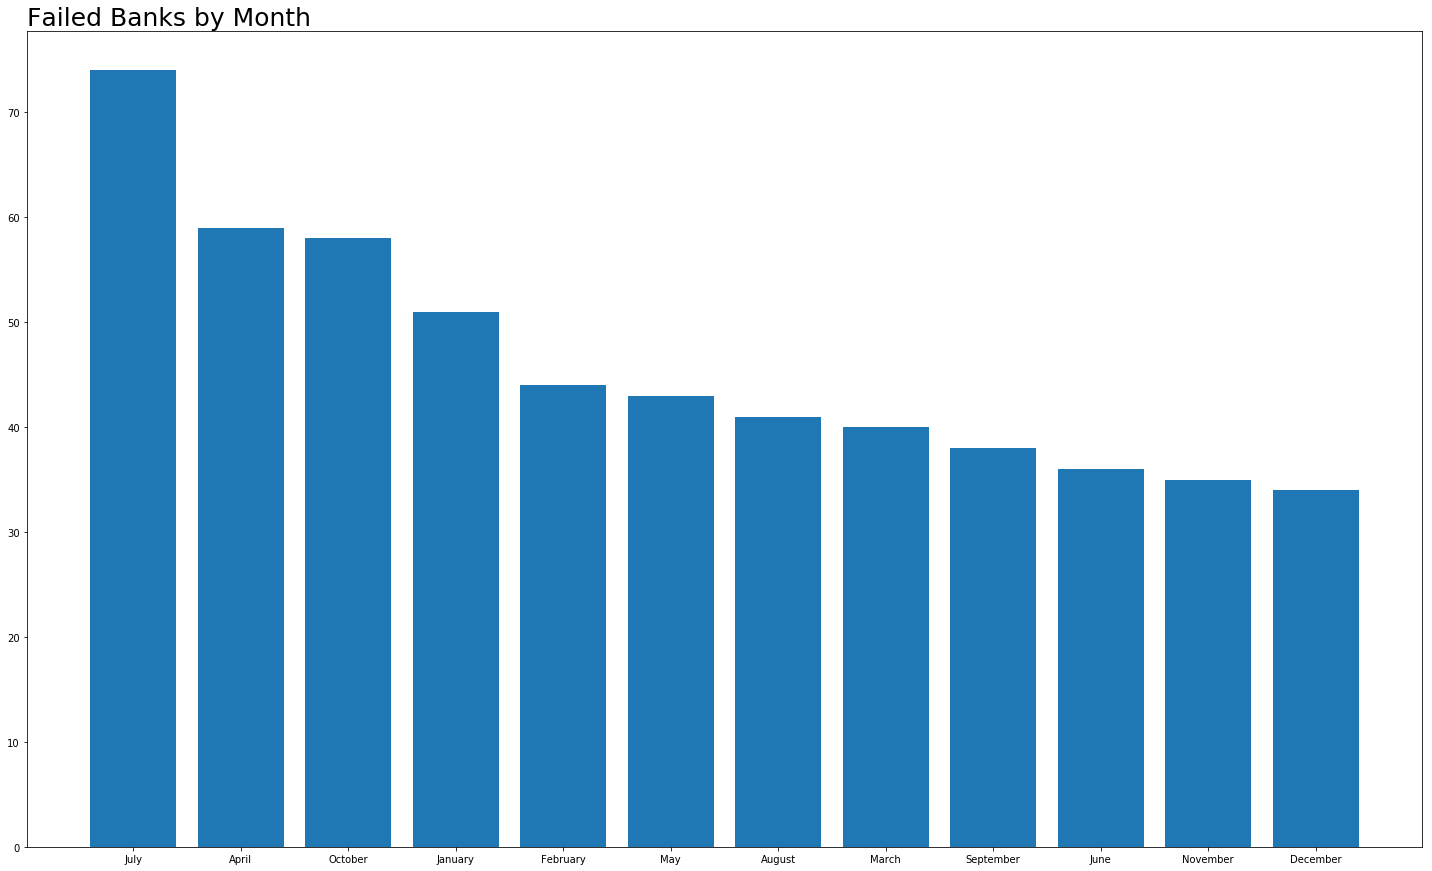

In [42]:
plt.bar(range(len(counts_by_month)), counts_by_month.values(), align='center')
plt.xticks(range(len(counts_by_month)), counts_by_month.keys())
plt.title('Failed Banks by Month',fontsize=25, loc='left')

plt.rcParams['figure.figsize'] = (25, 15)
plt.show()

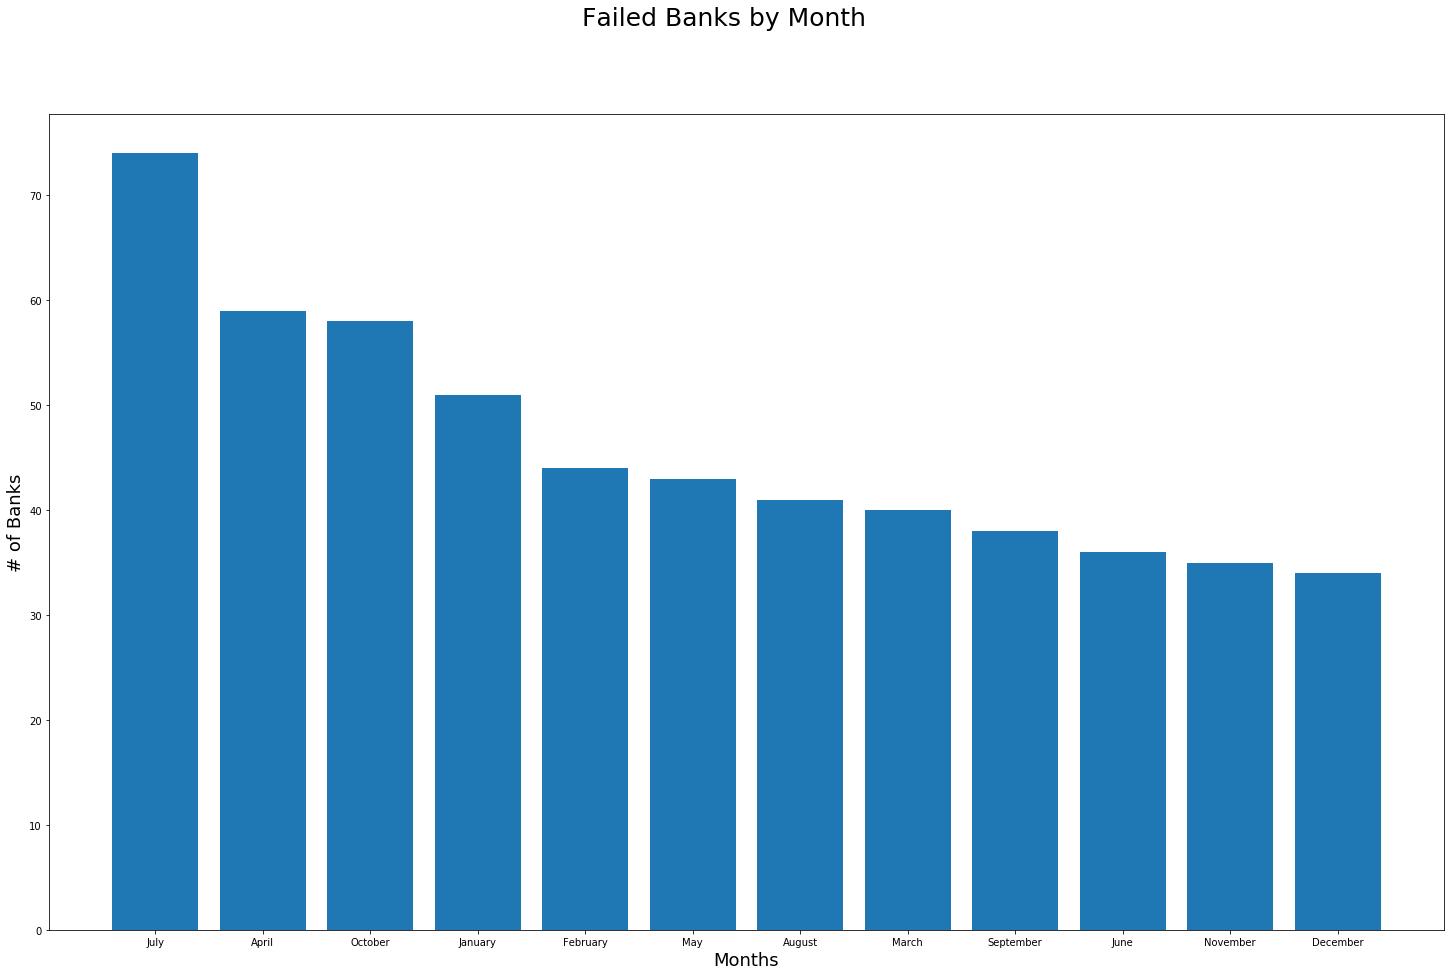

In [45]:
# Alternative plotting method

fig = plt.figure()
plt.bar(range(len(counts_by_month)), counts_by_month.values(), align='center')
fig.suptitle('Failed Banks by Month', fontsize=25)
plt.xticks(range(len(counts_by_month)), counts_by_month.keys())


plt.xlabel('Months', fontsize=18)
plt.ylabel('# of Banks', fontsize=18)
fig.savefig('test.jpg')
plt.show()